In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
# print(abalone.metadata)

# variable information
print(abalone.variables)

             name     role         type demographic  \
0             Sex  Feature  Categorical        None   
1          Length  Feature   Continuous        None   
2        Diameter  Feature   Continuous        None   
3          Height  Feature   Continuous        None   
4    Whole_weight  Feature   Continuous        None   
5  Shucked_weight  Feature   Continuous        None   
6  Viscera_weight  Feature   Continuous        None   
7    Shell_weight  Feature   Continuous        None   
8           Rings   Target      Integer        None   

                   description  units missing_values  
0         M, F, and I (infant)   None             no  
1    Longest shell measurement     mm             no  
2      perpendicular to length     mm             no  
3           with meat in shell     mm             no  
4                whole abalone  grams             no  
5               weight of meat  grams             no  
6  gut weight (after bleeding)  grams             no  
7        

In [3]:
X

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [4]:
y

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


#Step 1: Data Exploration and Visualization:
- The code includes a histogram for the distribution of 'Rings' and correlation heatmap for feature relationships
- install importent packages


In [5]:
# Install necessary packages
!pip install ucimlrepo xgboost shap joblib

# Import necessary libraries
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import shap
import joblib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 MB 25.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.2/540.2 kB 7.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 17.6 MB/s eta 0:00:0000:0100:01


In [6]:
# Fetch dataset
abalone = fetch_ucirepo(id=1)
X = abalone.data.features
y = abalone.data.targets

# Print variable information
print(abalone.variables)

             name     role         type demographic  \
0             Sex  Feature  Categorical        None   
1          Length  Feature   Continuous        None   
2        Diameter  Feature   Continuous        None   
3          Height  Feature   Continuous        None   
4    Whole_weight  Feature   Continuous        None   
5  Shucked_weight  Feature   Continuous        None   
6  Viscera_weight  Feature   Continuous        None   
7    Shell_weight  Feature   Continuous        None   
8           Rings   Target      Integer        None   

                   description  units missing_values  
0         M, F, and I (infant)   None             no  
1    Longest shell measurement     mm             no  
2      perpendicular to length     mm             no  
3           with meat in shell     mm             no  
4                whole abalone  grams             no  
5               weight of meat  grams             no  
6  gut weight (after bleeding)  grams             no  
7        

# Loading the Abalone Dataset:

- Read the dataset into a Pandas DataFrame: The dataset is loaded from an online source into a DataFrame without a header row.
- Set column names explicitly: Meaningful column names are assigned to the DataFrame to provide a better understanding of the data.
- Display the first few rows of the DataFrame: The initial rows of the DataFrame are displayed to verify the data loading and column naming.


In [7]:
# Load the dataset
target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")
abalone = pd.read_csv(target_url, header=None)
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

# One-hot encode the 'Sex' column
abalone = pd.get_dummies(abalone, columns=['Sex'])

# Separate features and target variable
X = abalone.drop('Rings', axis=1)
y = abalone['Rings']
print(y)

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64


## Visualizing the Distribution of Rings:
- Set the figure size: Initializes a new figure for the plot with a specified size of 10 inches by 6 inches to ensure consistent and appropriate dimensions.
- Create a histogram with KDE: Uses Seaborn's histplot function to create a histogram of the "Rings" column from the DataFrame. The kde=True argument adds a kernel density estimate line, and bins=30 specifies the number of bins.
  - This is important for understanding the distribution and density of the data, providing insights into the common values and spread.
- Set the plot title: Labels the plot with the title "Distribution of Rings" to provide context.
-Set the x-axis label: Labels the x-axis as "Number of Rings" to indicate what the axis represents.
- Set the y-axis label: Labels the y-axis as "Frequency" to show the count of occurrences.
- Enable the grid: Turns on the grid to make the plot easier to read and interpret.
- Show the plot: Displays the plot to visualize the distribution of the number of rings in the dataset.


Analyzing the Distribution of the 'Rings' Feature and Preparing Data for Machine Learning:
- Create a histogram for the 'Rings' feature:
  - Visualizing the distribution of the 'Rings' feature helps in understanding its spread and central tendency. It can also highlight any potential outliers or anomalies in the data.
- Preparing Data like before

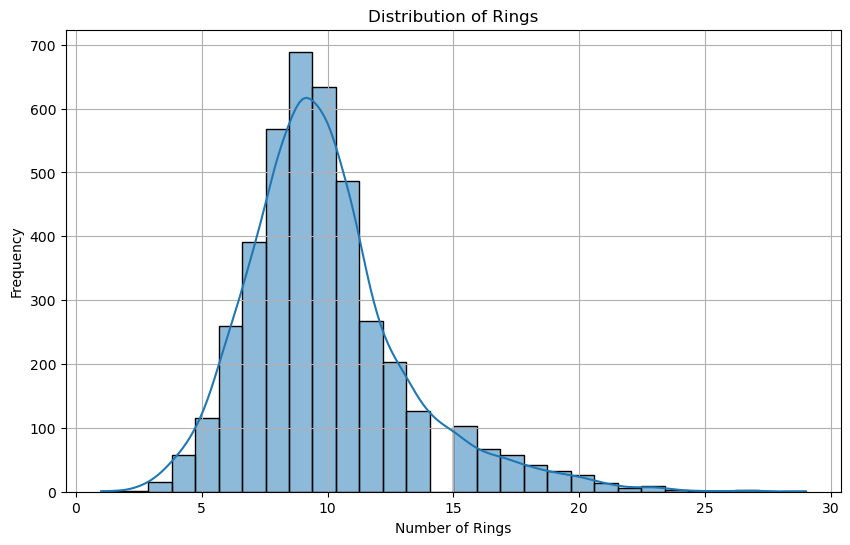

In [8]:
# Visualizing the distribution of 'Rings'
plt.figure(figsize=(10, 6))
sns.histplot(y, kde=True, bins=30)
plt.title('Distribution of Rings')
plt.xlabel('Number of Rings')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Handling Missing Values and Encoding Categorical Variables:
- Check for null values: This step involves checking the dataset for any missing (null) values. Identifying missing values is crucial because they can negatively impact the performance of machine learning models. Understanding the extent of missing data helps determine the appropriate method for handling it, such as imputation or removal.
- Encode categorical variables: This step converts categorical variables into a numerical format using one-hot encoding. Machine learning algorithms typically require numerical input, and one-hot encoding transforms categorical data into binary columns. Each category in the original column becomes a new column, where a 1 indicates the presence of that category and a 0 indicates its absence. This ensures that the data is in the correct format for model training and evaluation.
- Display the first few rows of the DataFrame: After encoding the categorical variables, the first few rows of the transformed DataFrame are displayed to verify the changes. This helps ensure that the encoding process was successful and that the DataFrame is ready for further analysis or machine learning tasks. Inspecting the initial rows provides a quick overview of the dataset's structure and confirms that the categorical variables have been correctly encoded.

In [9]:
abalone.isnull().sum(axis = 0) # if there are null values
abalone = pd.get_dummies(abalone)
abalone.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,False,False,True
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,False,False,True
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,True,False,False
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,False,False,True
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,False,True,False


## Creating a Correlation Map and Identifying Feature Importance:

- Compute the correlation matrix: This step calculates the correlation matrix for the first eight columns of the abalone DataFrame. The correlation matrix measures the strength and direction of the linear relationship between pairs of variables. The correlations are rounded to three decimal places for easier interpretation.
- Identify feature importance: This step identifies the features in descending order of their correlation with the last feature (assumed to be the target variable). Sorting the features by their correlation helps in understanding which features are most strongly associated with the target variable. This can guide feature selection and model development.
Print features in descending order of importance: The features are printed in descending order based on their importance. This provides a quick reference to understand which features might be most relevant for predicting the target variable.
- Create a correlation heatmap: This step visualizes the correlation matrix using a heatmap. A heatmap is a graphical representation of data where individual values are represented as colors. This helps in quickly identifying patterns and relationships between variables.
  - Set up the figure and axis: A figure and axis are created for the plot, with a specified size to ensure clarity and readability.
  - Display the correlation matrix: The correlation matrix is displayed as an image on the axis. Each cell in the heatmap represents the correlation between two variables.
  - Set tick marks and labels: Tick marks and labels are added to both the x-axis and y-axis to indicate the corresponding variables. This makes it easy to identify which variables are being compared.
  - Annotate the heatmap: Each cell in the heatmap is annotated with the correlation value. This provides precise numerical information alongside the color representation, making it easier to interpret the strength and direction of correlations.

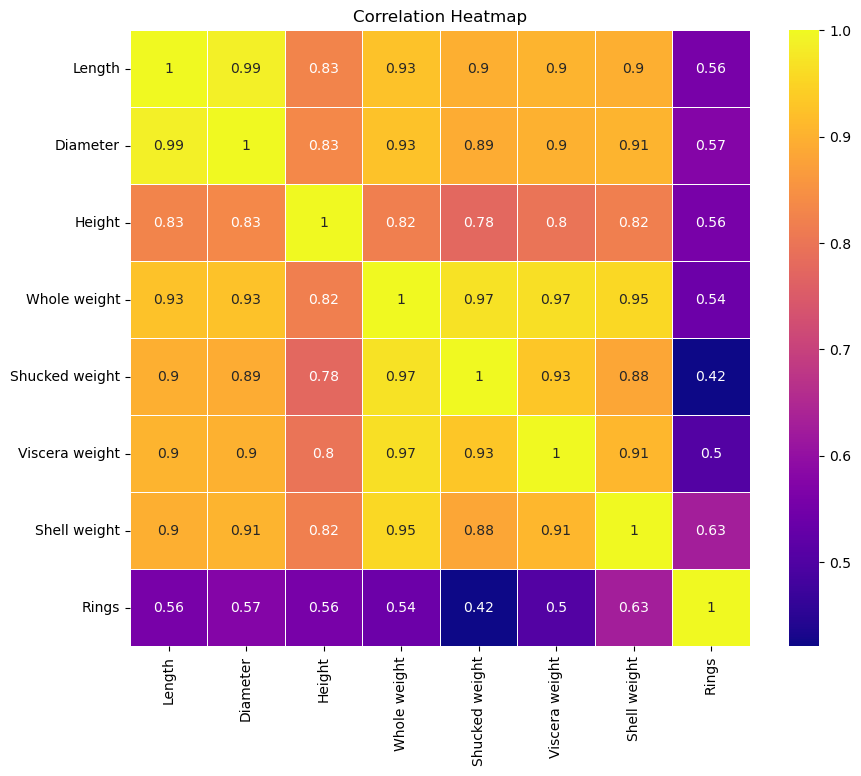

In [10]:
corMat = abalone.iloc[:, :8].corr().round(3)
plt.figure(figsize=(10, 8))
sns.heatmap(corMat, annot=True, cmap='plasma', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

#Step 2: Feature Engineering and Data Preparation
- Polynomial features are added to capture interaction terms
- Splitting the data into training and test sets Standardizing the features

Splitting the Data into Training and Test Sets and Standardizing the Features:

- Split the data into training and test sets: This step involves dividing the dataset into two parts: a training set and a test set. The training set is used to train the machine learning model, while the test set is used to evaluate its performance.
   - It helps in assessing the generalizability of the model.

- Standardize the features: This step involves scaling the features so that they have a mean of zero and a standard deviation of one. Standardization is a common preprocessing step that can improve the performance of many machine learning algorithms.
   - Importance: Standardizing the features ensures that all the features contribute equally to the model, preventing features with larger scales from dominating the learning process. This is especially important for algorithms that rely on distance metrics, such as k-nearest neighbors and support vector machines.

In [12]:
### Feature Engineering
from sklearn.preprocessing import PolynomialFeatures

# Feature Engineering: Polynomial Features
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

# Check the shape of the new feature set
print(X_poly.shape)

# Display the new feature names
feature_names = poly.get_feature_names_out(X.columns)
print(feature_names)

(4177, 55)
['Length' 'Diameter' 'Height' 'Whole weight' 'Shucked weight'
 'Viscera weight' 'Shell weight' 'Sex_F' 'Sex_I' 'Sex_M' 'Length Diameter'
 'Length Height' 'Length Whole weight' 'Length Shucked weight'
 'Length Viscera weight' 'Length Shell weight' 'Length Sex_F'
 'Length Sex_I' 'Length Sex_M' 'Diameter Height' 'Diameter Whole weight'
 'Diameter Shucked weight' 'Diameter Viscera weight'
 'Diameter Shell weight' 'Diameter Sex_F' 'Diameter Sex_I'
 'Diameter Sex_M' 'Height Whole weight' 'Height Shucked weight'
 'Height Viscera weight' 'Height Shell weight' 'Height Sex_F'
 'Height Sex_I' 'Height Sex_M' 'Whole weight Shucked weight'
 'Whole weight Viscera weight' 'Whole weight Shell weight'
 'Whole weight Sex_F' 'Whole weight Sex_I' 'Whole weight Sex_M'
 'Shucked weight Viscera weight' 'Shucked weight Shell weight'
 'Shucked weight Sex_F' 'Shucked weight Sex_I' 'Shucked weight Sex_M'
 'Viscera weight Shell weight' 'Viscera weight Sex_F'
 'Viscera weight Sex_I' 'Viscera weight Sex_M

## Data Preparation

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.4, random_state=20)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Step 3: Advanced Modeling Techniques

Testing Models for Best Mean Squared Error (MSE) and R^2 Score:

- Define a dictionary of models: A collection of different machine learning models is created. Each key in the dictionary is a string representing the model's name, and each value is an instance of the respective model. The models included are Linear Regression , Ridge Regression, Random Forest Regressor,
Gradient Boosting Regressor, SVR and K-Neighbors Regressor

- Set up cross-validation: A cross-validation object is created to split the data into training and validation sets multiple times. The K-Fold cross-validation object is configured with 5 splits to ensure a reliable performance assessment by reducing the variance associated with a single train-test split.

- Evaluate models with MSE and R^2 metrics: Each model is evaluated using both Mean Squared Error (MSE) and R^2 score. Predictions are generated using cross-validation, and the MSE and R^2 scores are computed for each model. The results are stored in a dictionary with the model names as keys and the metrics as values.

- Create and sort a DataFrame of results: The results dictionary is converted into a DataFrame and sorted by MSE. Sorting helps to quickly identify the model with the lowest MSE, indicating the best prediction accuracy.

- Print the sorted results: The sorted DataFrame of model performance metrics is displayed. This allows for an easy comparison of model performances and helps in identifying the best model according to the evaluated metrics.


In [34]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

models = {
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Ridge Regression": Ridge(),
    "Linear Regression": LinearRegression(),
    "SVR": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor()
}

# Set up cross-validation
cv = KFold(n_splits=5, random_state=20, shuffle=True)

# Evaluate models with MSE and R^2
results = {}
for name, model in models.items():
    y_pred = cross_val_predict(model, X_train_scaled, y_train, cv=cv)
    mse = mean_squared_error(y_train, y_pred)
    r2 = r2_score(y_train, y_pred)
    results[name] = {'MSE': mse, 'R^2': r2}

# Create and sort a DataFrame of results
df_results = pd.DataFrame.from_dict(results, orient='index')
df_results_sorted = df_results.sort_values('MSE')

print(df_results_sorted)

                            MSE       R^2
Ridge Regression       4.475952  0.558321
Linear Regression      4.626436  0.543472
Gradient Boosting      4.719994  0.534240
Random Forest          4.817804  0.524588
SVR                    4.921829  0.514323
K-Neighbors Regressor  5.458340  0.461381


1. Ridge Regression:
MSE: 4.475952
R²: 0.558321
Reason: Ridge Regression has the lowest MSE and the highest R² score among all models, indicating the most accurate predictions and the best fit to the data. It effectively handles multicollinearity and provides a good balance between bias and variance.

2. Linear Regression:
MSE: 4.626436
R²: 0.543472
Reason: Linear Regression has the second lowest MSE and a high R² score. It's a simple model that often serves as a good baseline for regression tasks.

3.
Gradient Boosting:
MSE: 4.719994
R²: 0.534240
Reason: Gradient Boosting has the third lowest MSE and a relatively high R² score, making it a strong performer. It often achieves high performance by combining weak learners.

4. Random Forest:
MSE: 4.817804
R²: 0.524588
Reason: Random Forest has a slightly higher MSE and a slightly lower R² compared to Gradient Boosting, but still performs well. It's an ensemble of decision trees and usually performs well with reduced overfitting.

5. SVR (Support Vector Regression):
MSE: 4.921829
R²: 0.514323
Reason: SVR has a higher MSE and a lower R² compared to the top models. It can capture complex relationships but may not be as effective as the top-performing models in this case.

6. K-Neighbors Regressor:
MSE: 5.458340
R²: 0.461381
Reason: K-Neighbors Regressor has the highest MSE and the lowest R² among all models, indicating that it may not be the best fit for this dataset. It captures non-linear relationships but may suffer from high variance in this case.

# Step 4: Hyperparameter Tuning:
GridSearchCV for hyperparameter tuning.

Code Explanation:
- Define parameter grids for each model: Parameter grids for hyperparameter tuning are specified for Gradient Boosting, Random Forest, and Ridge Regression. These grids define the range of values to be tested for each hyperparameter.

- Initialize models: The models are instantiated using their respective classes from scikit-learn.

- Set up cross-validation: A KFold cross-validation object is created to ensure a reliable performance assessment.

- Perform GridSearchCV for each model: GridSearchCV is used to perform an exhaustive search over the specified parameter grids for each model. The best estimator and corresponding parameters are identified based on the negative mean squared error.

- Evaluate the tuned models on the test set: The best estimators are used to make predictions on the test set, and the Mean Squared Error (MSE) is calculated for each model.

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

# Define parameter grids for each model
param_grids = {
    "Gradient Boosting": {
        'n_estimators': [100, 300, 500, 1000],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7, 10],
        'subsample': [0.6, 0.8, 1.0]
    },
    "Random Forest": {
        'n_estimators': [100, 300, 500, 1000],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    },
    "Ridge Regression": {
        'alpha': [0.1, 1.0, 10.0, 100.0]
    },
    "Linear Regression": {},
    "SVR": {
        'C': [0.1, 1, 10],
        'epsilon': [0.1, 0.2, 0.5],
        'kernel': ['linear', 'rbf']
    },
    "K-Neighbors Regressor": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}


In [ ]:
best_estimators = {}
cv = KFold(n_splits=5, random_state=42, shuffle=True)

for model_name, model in models.items():
    print(f"Tuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
    grid_search.fit(X_train_scaled, y_train)
    best_estimators[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    print(f"Best cross-validated MSE for {model_name}: {grid_search.best_score_}")


Tuning hyperparameters for Gradient Boosting...
Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.8}
Best cross-validated MSE for Gradient Boosting: -4.61407406404474
Tuning hyperparameters for Random Forest...
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best parameters for Random Forest: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 1000}
Best cross-validated MSE for Random Forest: -4.616471800216947
Tuning hyperparameters for Ridge Regression...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best parameters for Ridge Regression: {'alpha': 1.0}
Best cross-validated MSE for Ridge Regression: -4.453042609642914
Tuning hyperparameters for Linear Regression...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters for Linear Regression: {}
Best cross-valida

#Step 5 Model Evaluation:
- Evaluation using MSE, R², and MAE.
- Cross-validation

In [ ]:
### Model Evaluation (with Cross-Validation)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Evaluate the best estimators on the test set
test_results = {}
for model_name, model in best_estimators.items():
    y_pred_test = model.predict(X_test_scaled)
    test_mse = mean_squared_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_results[model_name] = test_mse  # Store only MSE for simplicity
    print(f"Test MSE for {model_name}: {test_mse}")
    print(f"Test R2 for {model_name}: {test_r2}")
    print(f"Test MAE for {model_name}: {test_mae}")

print(test_results)



Test MSE for Gradient Boosting: 4.914094005641637
Test R2 for Gradient Boosting: 0.5439090807907472
Test MAE for Gradient Boosting: 1.5358552801028682
Test MSE for Random Forest: 4.843517765891398
Test R2 for Random Forest: 0.5504594605810125
Test MAE for Random Forest: 1.5277202102436995
Test MSE for Ridge Regression: 4.716945566145326
Test R2 for Ridge Regression: 0.5622069832906407
Test MAE for Ridge Regression: 1.5188049993025143
Test MSE for Linear Regression: 4.74608999312945
Test R2 for Linear Regression: 0.5595020068539353
Test MAE for Linear Regression: 1.5166882212669401
Test MSE for SVR: 4.966085414779286
Test R2 for SVR: 0.5390836115267584
Test MAE for SVR: 1.5017415041288056
Test MSE for K-Neighbors Regressor: 5.446720109016575
Test R2 for K-Neighbors Regressor: 0.49447455047768707
Test MAE for K-Neighbors Regressor: 1.609940739821129
{'Gradient Boosting': 4.914094005641637, 'Random Forest': 4.843517765891398, 'Ridge Regression': 4.716945566145326, 'Linear Regression': 4.7

Cross-validated MSE for Gradient Boosting:
Mean MSE: 4.61407406404474
Standard Deviation of MSE: 0.47925321949888644


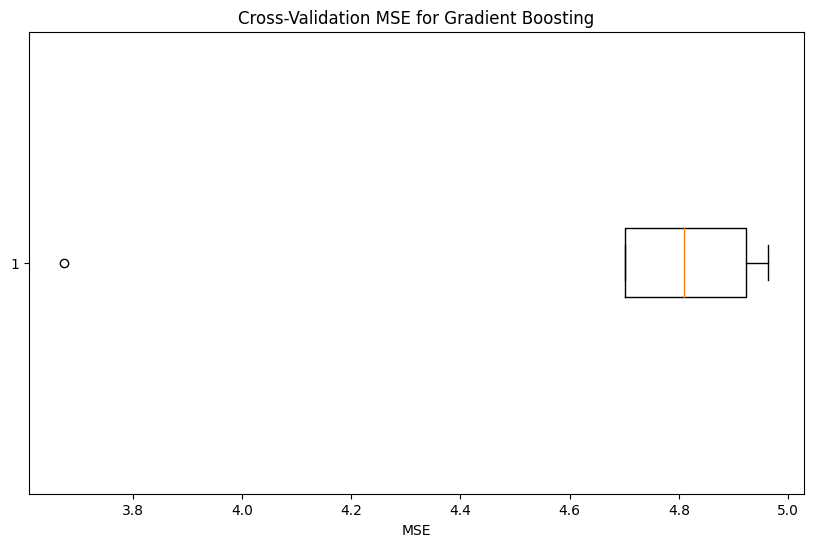

Cross-validated MSE for Random Forest:
Mean MSE: 4.616471800216947
Standard Deviation of MSE: 0.4601885818692792


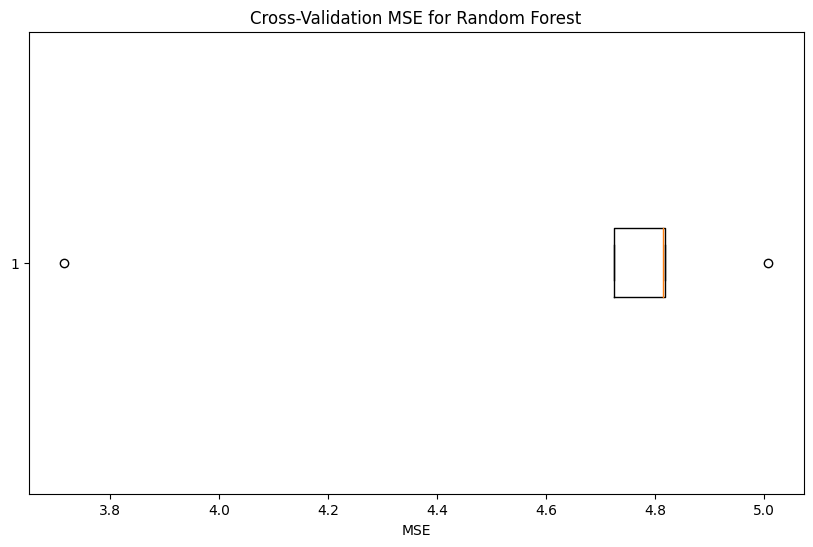

Cross-validated MSE for Ridge Regression:
Mean MSE: 4.453042609642914
Standard Deviation of MSE: 0.4006006528672293


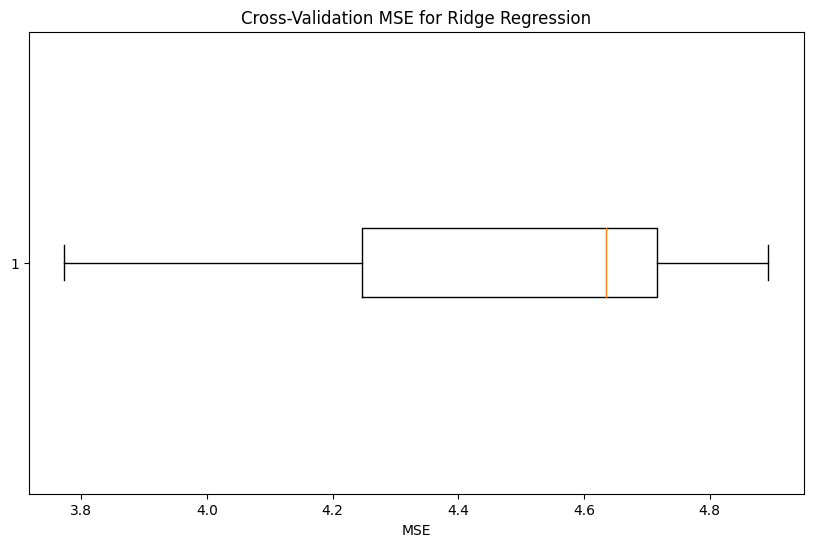

Cross-validated MSE for Linear Regression:
Mean MSE: 4.55877619627867
Standard Deviation of MSE: 0.4901417365972942


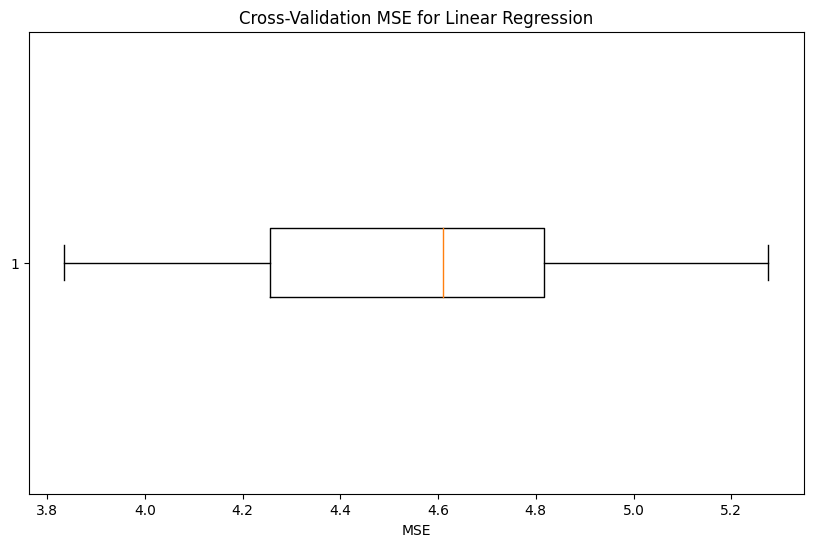

Cross-validated MSE for SVR:
Mean MSE: 4.553161277560072
Standard Deviation of MSE: 0.48651696624793606


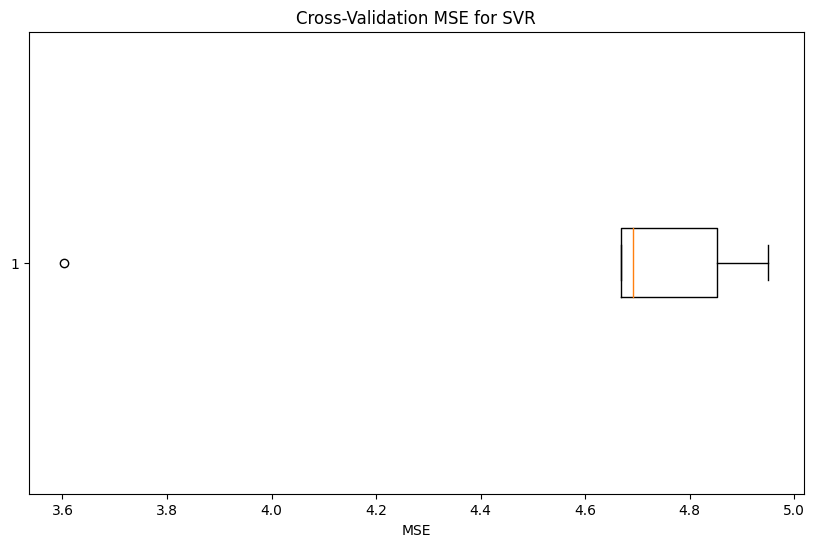

Cross-validated MSE for K-Neighbors Regressor:
Mean MSE: 5.041555906262321
Standard Deviation of MSE: 0.5916778169503017


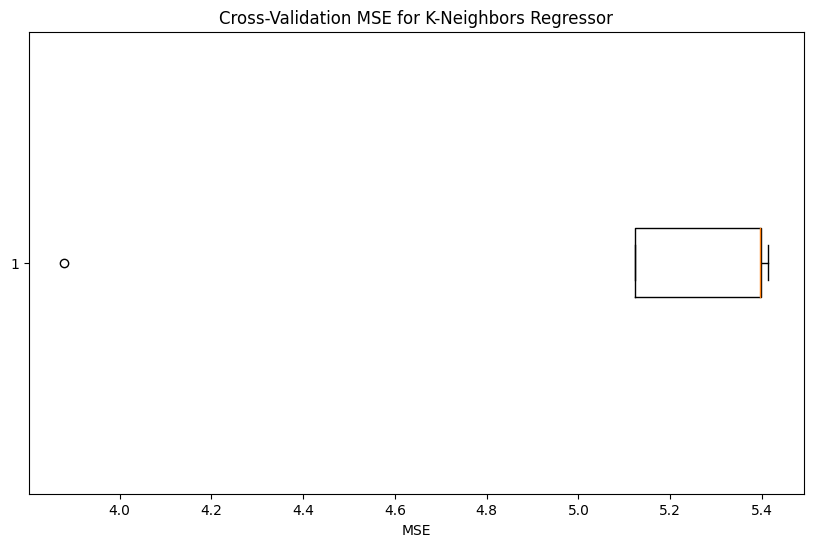

In [ ]:
# Perform cross-validation on all the best models
from sklearn.model_selection import cross_val_score
cv_results = {}
for model_name, model in best_estimators.items():
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1)
    cv_mse_scores = -cv_scores
    mean_cv_mse = cv_mse_scores.mean()
    std_cv_mse = cv_mse_scores.std()

    cv_results[model_name] = {
        'mean_mse': mean_cv_mse,
        'std_mse': std_cv_mse,
        'cv_scores': cv_mse_scores
    }

    print(f"Cross-validated MSE for {model_name}:")
    print(f"Mean MSE: {mean_cv_mse}")
    print(f"Standard Deviation of MSE: {std_cv_mse}")


    plt.figure(figsize=(10, 6))
    plt.boxplot(cv_mse_scores, vert=False)
    plt.title(f'Cross-Validation MSE for {model_name}')
    plt.xlabel('MSE')
    plt.show()

#Step 6: Feature Importance:
- Plotting feature importances for Random Forest and Gradient Boosting.

Plotting Feature Importance
-  If Random Forest/ Gradient Boosting is one of the best models found during hyperparameter tuning, its feature importances are extracted and plotted.- Feature importances are stored in the feature_importances_ attribute of the Random Forest model.- The top 10 most important features are selected and plotted as a horizontal bar plot.

Overall Importance:
- Feature Importance Visualization: By visualizing the feature importances or coefficients, we gain insights into which features are most influential in the model's predictions. This can help in feature selection, model interpretation, and understanding the underlying relationships in the data.
- Model Transparency: Understanding feature importances increases the transparency of the models. It allows us to see how the models are making decisions, which is particularly useful for explaining the models to stakeholders.
- Data Insights: These plots can reveal important patterns and relationships in the data, highlighting the most significant predictors for the target variable. This can guide further analysis and feature engineering efforts.

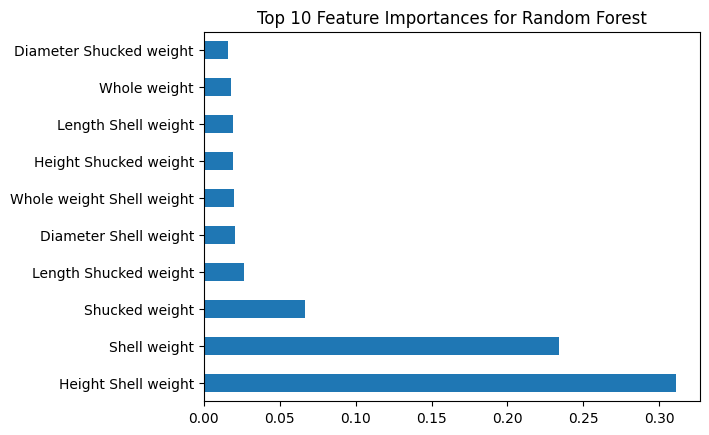

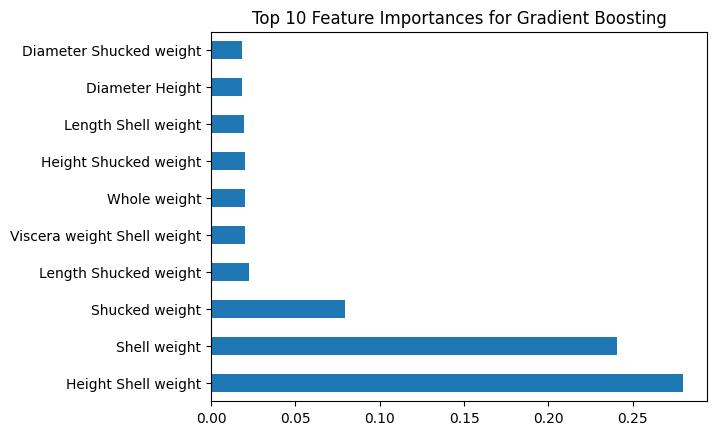

In [ ]:
for model_name in ['Random Forest', 'Gradient Boosting']:
    if model_name in best_estimators:
        model = best_estimators[model_name]
        importances = pd.Series(model.feature_importances_, index=poly.get_feature_names_out(X.columns))
        importances.nlargest(10).plot(kind='barh')
        plt.title(f'Top 10 Feature Importances for {model_name}')
        plt.show()


Performing Cross-Validation on the Best Models:
- Cross-Validation: This technique is used to evaluate the model's performance on different subsets of the training data, providing a more reliable estimate of the model's generalization ability.
- Mean and Standard Deviation of MSE: These metrics summarize the model's performance across different cross-validation folds, indicating the average error and variability.
- Boxplot Visualization: Boxplots provide a visual representation of the distribution of MSE scores, helping to identify outliers and the spread of the model's performance.

Importance:
- Reliable Model Evaluation: Cross-validation provides a robust estimate of model performance, reducing the risk of overfitting to a single train-test split.
- Understanding Model Stability: By examining the standard deviation of MSE scores, we can assess the stability and reliability of the model's performance.
- Visualizing Performance Distribution: Boxplots help to visualize the range and distribution of model errors, providing insights into the consistency of the model's predictions.

#Step 7: Model Interpretation
- SHAP values.


Ridge()


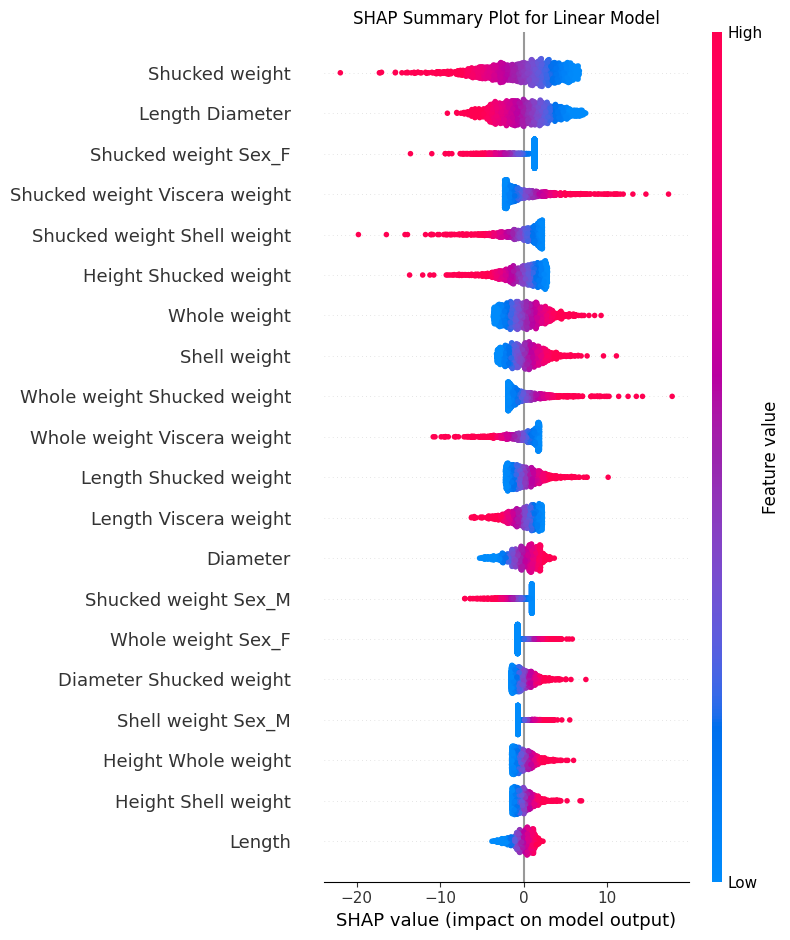

In [ ]:
import shap

# Identify the best model based on MSE
best_model_name = min(test_results, key=test_results.get)
best_model = best_estimators[best_model_name]
print(best_model)

# Use SHAP to explain the model predictions
if isinstance(best_model, (RandomForestRegressor, GradientBoostingRegressor, xgb.XGBRegressor)):
    explainer = shap.TreeExplainer(best_model)
    explainer.check_additivity = False
    shap_values = explainer.shap_values(X_test_scaled)
    plot_title = "SHAP Summary Plot for Tree-Based Model"
elif isinstance(best_model, (LinearRegression, Ridge, Lasso)):
    explainer = shap.LinearExplainer(best_model, X_train_scaled)
    shap_values = explainer.shap_values(X_test_scaled)
    plot_title = "SHAP Summary Plot for Linear Model"
else:
    explainer = shap.KernelExplainer(best_model.predict, X_train_scaled)
    shap_values = explainer.shap_values(X_test_scaled)
    plot_title = "SHAP Summary Plot for Kernel-Based Model"

# SHAP summary plot
plt.title(plot_title)
shap.summary_plot(shap_values, X_test_scaled, feature_names=poly.get_feature_names_out(X.columns))



# Step 8: Model Deployment
- Saving and loading the model with joblib.

In [ ]:

import joblib


joblib.dump(best_model, 'best_model.pkl')
print(best_model)


loaded_model = joblib.load('best_model.pkl')
example_data = X_test_scaled[:5]
predictions = loaded_model.predict(example_data)
print("Predictions for example data:", predictions)

Ridge()
Predictions for example data: [ 9.88547472  9.77650002 11.46188091  9.29792818  9.06843736]
